# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = url+"appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | tangalle
Processing Record 5 of Set 1 | bodo
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | sao vicente
Processing Record 8 of Set 1 | vadso
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | mutoko
Processing Record 13 of Set 1 | sinan
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | khandyga
Processing Record 20 of Set 1 | norilsk
Processing Record 21 of Set 1 | saint-joseph
Processing Record 22 of Set 1 | margaret river

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,292.54,62,0,0.45,NZ,1711752512
1,petropavlovsk-kamchatsky,53.0452,158.6483,267.48,58,0,2.00,RU,1711752433
2,nagqu,31.5000,92.0000,268.97,63,46,0.77,CN,1711752514
3,tangalle,6.0240,80.7911,298.04,85,27,2.64,LK,1711752516
4,bodo,67.2800,14.4050,275.25,68,75,10.80,NO,1711752292
...,...,...,...,...,...,...,...,...,...
581,malango,-2.9627,119.9001,293.88,95,80,0.72,ID,1711753400
582,nizhneudinsk,54.9076,99.0276,270.03,97,100,1.49,RU,1711753401
583,san rafael,-34.6177,-68.3301,302.33,35,0,5.40,AR,1711753239
584,margate,51.3813,1.3862,283.09,84,93,1.79,GB,1711753176


In [5]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"].apply(lambda x: (x -273.15))
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,19.39,62,0,0.45,NZ,1711752512
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,58,0,2.00,RU,1711752433
2,nagqu,31.5000,92.0000,-4.18,63,46,0.77,CN,1711752514
3,tangalle,6.0240,80.7911,24.89,85,27,2.64,LK,1711752516
4,bodo,67.2800,14.4050,2.10,68,75,10.80,NO,1711752292


In [6]:
# Export the City_Data into a csv
#!mkdir output_data
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,19.39,62,0,0.45,NZ,1711752512
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,58,0,2.00,RU,1711752433
2,nagqu,31.5000,92.0000,-4.18,63,46,0.77,CN,1711752514
3,tangalle,6.0240,80.7911,24.89,85,27,2.64,LK,1711752516
4,bodo,67.2800,14.4050,2.10,68,75,10.80,NO,1711752292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

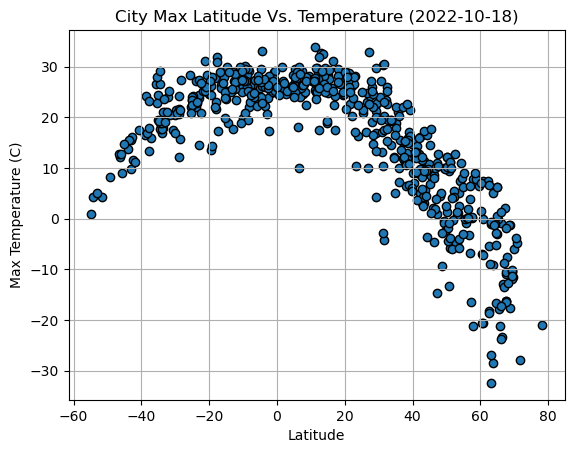

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude Vs. Temperature (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

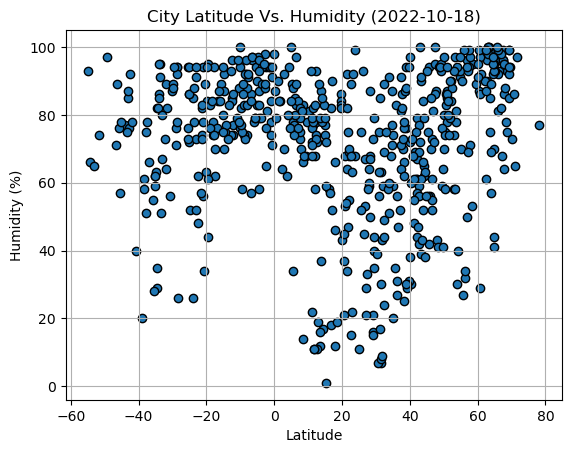

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

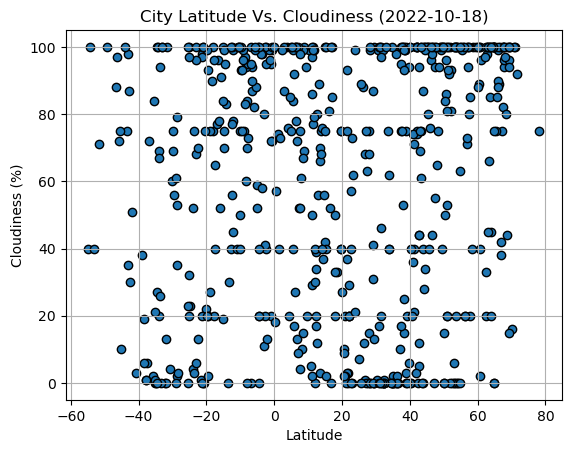

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

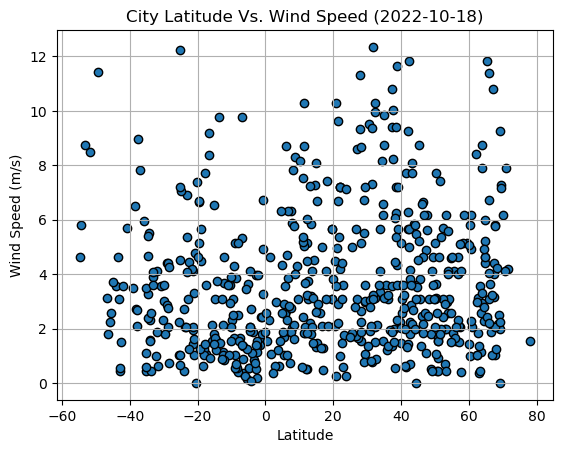

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(x_value,y_value):
    (slope , intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
    line_value=x_value * slope + intercept
    line_eq="y="+str(round(slope,2))+"x +"+str(round(intercept,2))
    plt.plot(x_value,line_value,"r-")
    plt.annotate(line_eq,(np.mean(x_value),np.min(y_value)),fontsize=15,color="red")
    #plt.annotate(line_eq,(20,250),fontsize=15,color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,-5.67,58,0,2.00,RU,1711752433
2,nagqu,31.5000,92.0000,-4.18,63,46,0.77,CN,1711752514
3,tangalle,6.0240,80.7911,24.89,85,27,2.64,LK,1711752516
4,bodo,67.2800,14.4050,2.10,68,75,10.80,NO,1711752292
5,aasiaat,68.7098,-52.8699,-17.65,93,44,2.15,GL,1711752518


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,19.39,62,0,0.45,NZ,1711752512
6,sao vicente,-23.9631,-46.3919,27.10,26,52,0.45,BR,1711752481
10,east london,-33.0153,27.9116,20.97,67,100,3.88,ZA,1711752307
11,mutoko,-17.3970,32.2268,17.22,70,65,1.08,ZW,1711752527
13,puerto ayora,-0.7393,-90.3518,28.98,91,72,4.92,EC,1711752530


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8731803150546662


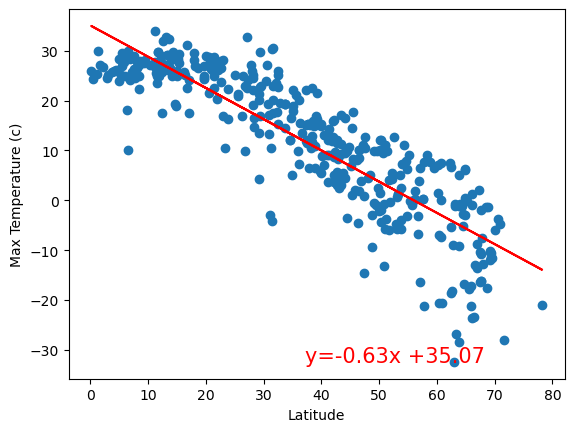

In [15]:
# Linear regression on Northern Hemisphere

x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()


The r-value is:0.6992998570360394


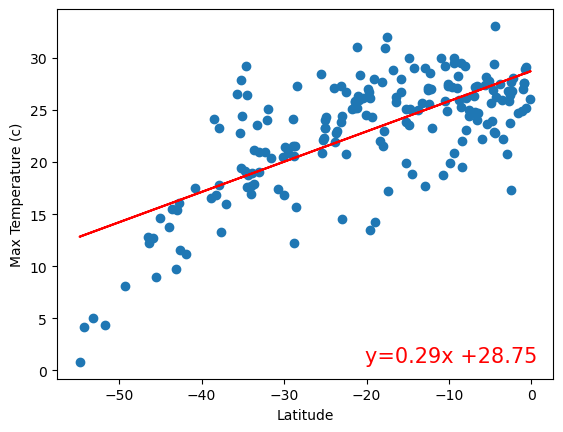

In [16]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

## Discussion about the linear relationship: 
 Considering the Latitudes Vs. Temperature plots on different hemispheres:
* Northern Hemisphere shows a strong negative correlation between latitude and temperature. That is as the latitude increases the temperature falls.
* The Southern Hemisphere shows a moderate positive correlation between latitude and temperature. That is as the latitude increases the temperature also increases.
The R-values obtained in this analysis also support the above conclusions.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.2728830839441329


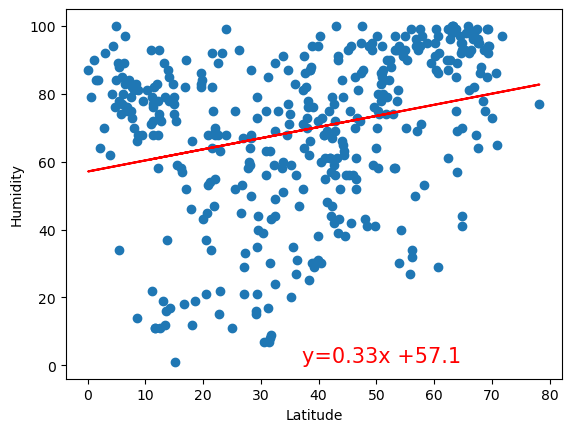

In [17]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is:0.3304885991297942


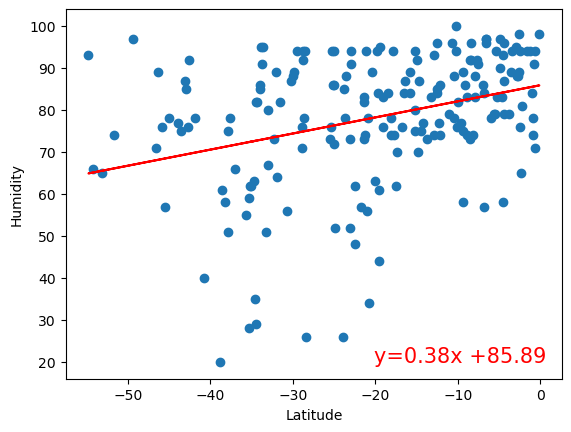

In [18]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Discussion about the linear relationship:
Considering the Latitude vs. Humidity plots on different hemispheres:
* Northern Hemisphere shows a weak positive linear relation between Latitude and Humidity. 
* The correlation between humidity and latitude is considerably weak in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.21526636519403403


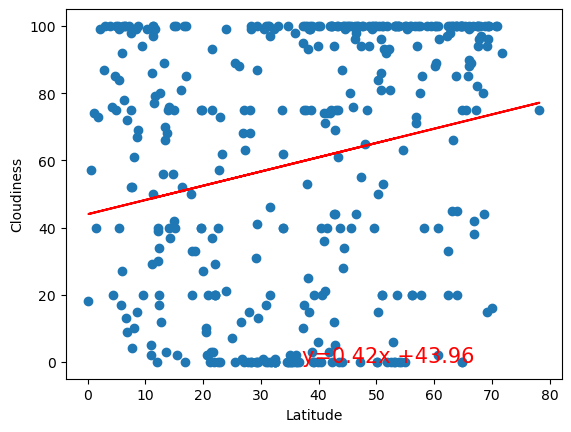

In [19]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is:0.2544744632709285


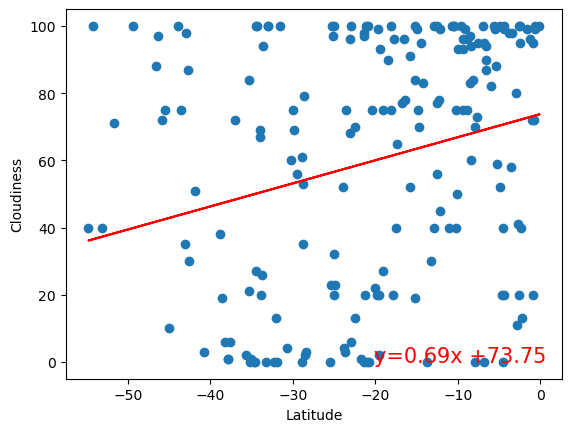

In [20]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Discussion about the linear relationship:
*Northern Hemisphere:
Considering the r-value it shows these two parameters (Latitude and cloudiness) have a weak correlation.

*Southern Hemisphere:
Here when we consider the r-value, it shows that the correlation between latitude and cloudiness is very weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.016457430763657147


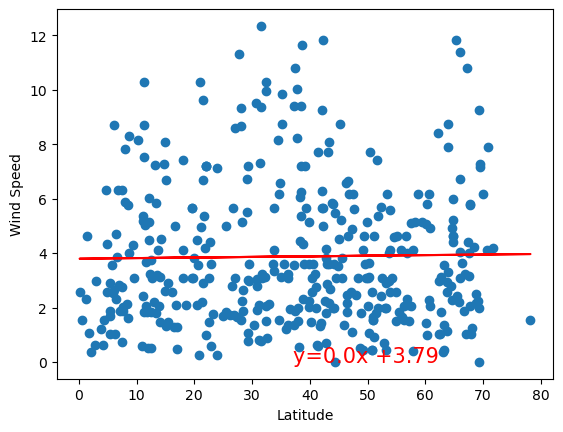

In [21]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is:-0.2721464538170856


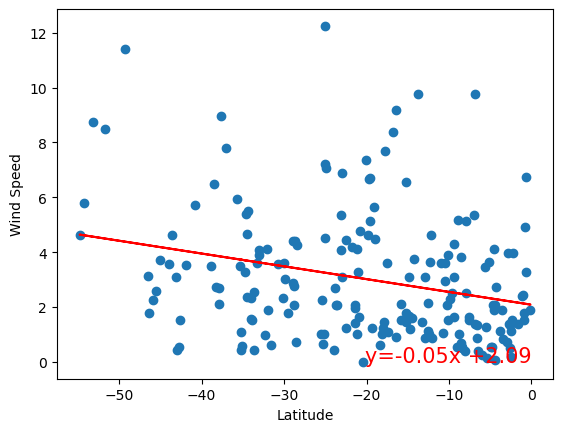

In [22]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
rvalue=linregress(x_value,y_value)
print(f"The r-value is:{rvalue[2]}")
plt.scatter(x_value,y_value)
regression(x_value,y_value)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Discussion about the linear relationship:
* Northern Hemisphere:
Considering the r-value it shows these two parameters (Latitude, Wind Speed) have a very weak/none correlation.
*Southern Hemisphere:
Here also the Latitude and Wind Speed show a very weak/no correlation.
